### Setup

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt

random_seed = 2_147_483_647
np.random.seed(random_seed)

### Confidence interval estimation

$1 - \alpha$ confidence interval formula:
$$\bigg(\bar{x}_n - z_{1-\alpha/2} \cdot \frac{\sigma}{\sqrt{n}}, \bar{x}_n + z_{1-\alpha/2} \cdot \frac{\sigma}{\sqrt{n}}\bigg) $$
where:
- $z_{1 -\alpha / 2}$﻿ — noromal distribution quantile,
- $\alpha$﻿ — level of confidence,
- $\bar{x}_n$﻿ — sample mean.

The recommended number of bootstrap iterations usually falls in the range between $1 000$ and $10 000$.
To get an unbiased statistic estimation, the size of the bootstrap sample has to be equal to that of the original sample.  

In [2]:
# read the data
times = pd.read_csv(
    'https://code.s3.yandex.net/Math/datasets/Times.csv', 
    header=None).values.flatten().tolist()

# experiment parameters
n = len(times)
k = 1500
alpha = 0.05
q = 1 - alpha / 2  # q for quantile

# generate normal distribution
Z = stats.norm(loc=0, scale=1)
z = Z.ppf(q=q)  # calculate z-statistic

bootstrap_medians = []

i = 0
while i < k:
    bootstrap_values = np.random.choice(times, size=n, replace=True)
    bootstrap_medians.append(np.median(bootstrap_values))
    i += 1
    
me_mean = np.mean(bootstrap_medians)
me_std = np.std(bootstrap_medians)

me_left = me_mean - z * me_std / np.sqrt(k)
me_right = me_mean + z * me_std / np.sqrt(k)

print("With 95% probability the median value would be between: (", me_left, ",", me_right, ")")

With 95% probability the median value would be between: ( 50.236827523296576 , 50.31146674189855 )


### Percentile confidence interval

estimation technique is used when the variable has a non-symmetrical distribution. 

The **algorithm for calculating the percentile confidence interval** goes as follows:
1. Generate a set of statistics using bootstrap, **sort it in ascending order**.
2. Calculate the values
    
    $i = \bigg[\frac{\alpha}{2} \cdot k\bigg], \ j = \bigg[\Big(1 - \frac{\alpha}{2}\Big) \cdot k\bigg]$
    
    where $k$﻿ is the number of generated bootstrap samples and $[x]$﻿ is the integer part of $x$﻿.
    
3. Select values form the sorted sample of generated statistics with indices from $i$﻿ to $j$﻿.
    
    The resulting sample is called **percentile confidence interval** with the confidence level of $1 - \alpha$﻿.


> This technique can produce bad results when original distribution has complex distribution function. For instance, double summit distribution.

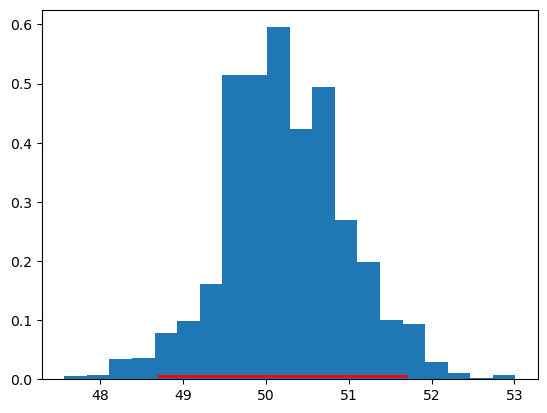

In [3]:
# experiment parameters
n = len(times)
k = 1500
alpha = 0.05

bootstrap_medians = []

i = 0
while i < k:
    bootstrap_values = np.random.choice(times, size=n, replace=True)
    bootstrap_medians.append(np.median(bootstrap_values))
    i += 1
    
bootstrap_medians = sorted(bootstrap_medians)

left = int(alpha / 2 * k)
right = int((1 - alpha / 2) * k)
x1 = bootstrap_medians[left]
x2 = bootstrap_medians[right]

plt.hlines(y=0.005, xmin=x1, xmax=x2, linewidth=2, color='r')
plt.hist(bootstrap_medians, density=True, bins=20)
plt.show()